In [8]:
%matplotlib inline

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import noise_estimation as ne

In [28]:
def get_noise_estimations(image, levels, patch_size=8):
    estimated = []
    for level in levels:
        sigma = level / 255
        noisy_image = image + np.random.randn(*image.shape) * sigma
        est_level = ne.noise_estimate(noisy_image, patch_s=patch_size)
        estimated.append(est_level * 255)

    return np.array(estimated)

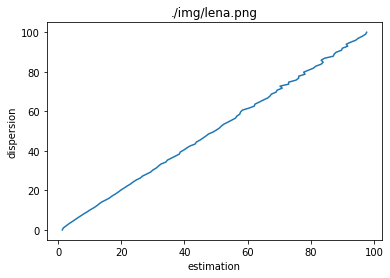

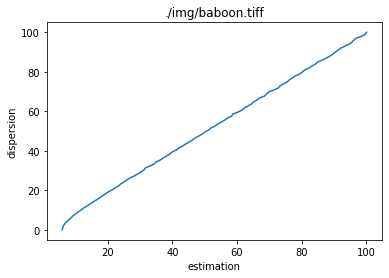

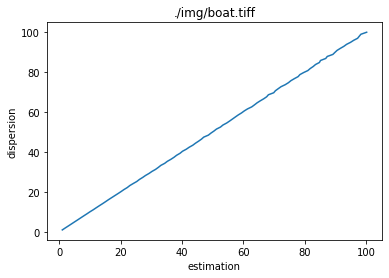

In [23]:
images_path = ["./img/lena.png", "./img/baboon.tiff", "./img/boat.tiff"]
noise_levels = np.linspace(0, 100, 100)
for path in images_path:
    image = cv2.imread(path)
    image = ne.im2double(image)
    
    estimation = get_noise_estimations(image, noise_levels)
    
    plt.figure()
    plt.xlabel('estimation')
    plt.ylabel('dispersion')
    plt.title(path)
    
    plt.plot(estimation, noise_levels)
    figname = "ns_est_" + path[6:-5] + ".jpg"
    plt.savefig(figname)

In [24]:
# Grayscale

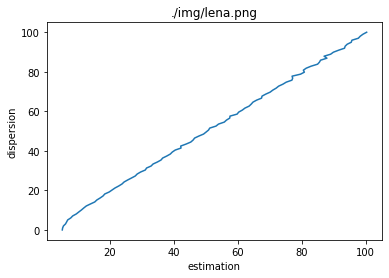

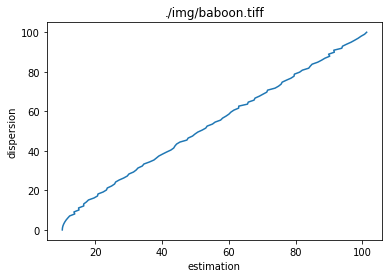

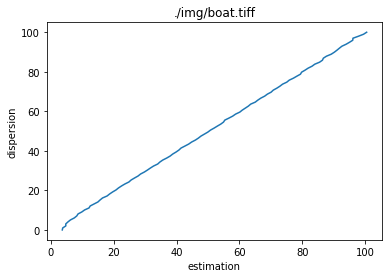

In [25]:
for path in images_path:
    image = cv2.imread(path, 0)
    image = ne.im2double(image)
    
    estimation = get_noise_estimations(image, noise_levels)
    
    plt.figure()
    plt.xlabel('estimation')
    plt.ylabel('dispersion')
    plt.title(path)
    
    plt.plot(estimation, noise_levels)
    figname = "ns_est_" + path[6:-5] + "_g.jpg"
    plt.savefig(figname)

In [26]:
# Импульсный шум
# - случайные изолированные точки на изображении, 
# значения которых значительно отличаются от значений окружающих их точек 

In [27]:
# Зависимость уровня шума от patch_size на примере одной картинки

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done


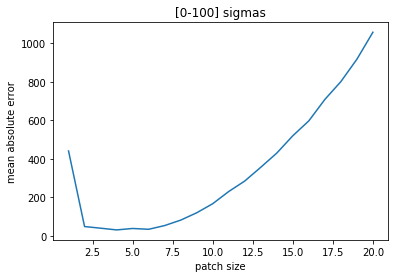

In [44]:
patch_sizes = np.linspace(1, 20, 20)
lena_path = images_path[0]
mae = []
for (i, patch_size) in enumerate(patch_sizes):
    print("{} done".format(i))
        
    image = cv2.imread(lena_path)
    image = ne.im2double(image)
    
    estimation = get_noise_estimations(image, noise_levels, int(patch_size))
    mae.append(np.sum(abs(estimation - noise_levels)))
    
plt.figure()
plt.xlabel('patch size')
plt.ylabel('mean absolute error')
plt.title("[0-100] sigmas")
    
plt.plot(patch_sizes, mae)
figname = "lena_patchsize-mae" + ".jpg"
plt.savefig(figname)